
<a id='lucas-asset'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Precificação de Ativos II: O Modelo de Precificação de Ativos de Lucas


<a id='index-0'></a>

## Contéudo

- [Precificação de Ativos II: O Modelo de Precificação de Ativos de Lucas](#Precificação-de-Ativos-II:-O-Modelo-de-Precificação-de-Ativos-de-Lucas)  
  - [Resumo](#Resumo)  
  - [O Modelo de Lucas](#O-Modelo-de-Lucas)  
  - [Exercícos](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.

## Resumo

Como afirmado em uma [aula anterior](https://julia.quantecon.org/markov_asset.html), um ativo é uma direito sobre um fluxo de pagamentos em potencial.

Qual é o preço correto a pagar por tal direito?

O modelo elegante de precificação de ativos de Lucas [[Luc78]](https://julia.quantecon.org/../zreferences.html#lucas1978) tenta responder a essa pergunta em um ambiente de equilíbrio com agentes avessos ao risco.

Embora tenhamos mencionado algumas consequências do modelo de Lucas [anteriormente](https://julia.quantecon.org/markov_asset.html#mass-pra), é hora de trabalhar o modelo com mais cuidado e tentar entender de onde vem a equação fundamental de precificação de ativos.

Um benefício colateral do estudo do modelo de Lucas é que ele fornece uma bela ilustração da construção de modelos em geral e da precificação de equilíbrio em modelos competitivos em particular.

Outra diferença em nossa [primeira aula de precificação de ativos](https://julia.quantecon.org/markov_asset.html) é que o espaço de estado e o choque serão contínuos e não discretos.

## O Modelo de Lucas


<a id='index-1'></a>
Lucas estudou uma economia de troca pura com um consumidor representativo (ou família), onde:

- *Troca pura* significa que todas as dotações são exógenas.  
- Consumidor *representavo* significa que:
  
  - existe um único consumidor (às vezes também chamado de família), ou 
  - todos os consumidores têm dotações e preferências idênticas 
  


De qualquer maneira, a suposição de um agente representativo significa que os preços se ajustam para erradicar os desejos de comércio.

Isso facilita a computação de preços de equilíbrio competitivo.

### Configuração Básica

Vamos revisar a configuração.

#### Ativos


<a id='index-2'></a>
Existe uma única “unidade produtiva” que gera uma sequência sem custo de bens de consumo  $ \{y_t\}_{t=0}^{\infty} $.

Outra maneira de ver $ \{y_t\}_{t=0}^{\infty} $ é como uma *dotação de consumo* para essa economia.

Assumiremos que essa dotação é Markoviana, seguindo o processo exógeno:

$$
y_{t+1} = G(y_t, \xi_{t+1})
$$

Aqui $ \{ \xi_t \} $ é um sequência de choque iid com distribuição conhecida $ \phi $ e $ y_t \geq 0 $.

Um ativo é um direito de todo ou parte desse fluxo de dotação.

Os bens de consumo $ \{y_t\}_{t=0}^{\infty} $ não são estocáveis, portanto, manter ativos é a única maneira de transferir riqueza para o futuro.

Para fins de intuição, é comum pensar na unidade produtiva como uma “árvore” que produz frutos.

Com base nessa idéia, uma “árvore de Lucas” é um direito sobre a dotação de consumo.

#### Consumidores


<a id='index-3'></a>
Um consumidor representativo classifica os fluxos de consumo $ \{c_t\} $ de acordo com a utilidade funcional separável no tempo


<a id='equation-lt-uf'></a>
$$
\mathbb{E} \sum_{t=0}^\infty \beta^t u(c_t) \tag{1}
$$

aqui:

- $ \beta \in (0,1) $ é um fator de desconto fixado
- $ u $ é estritamente crescente, estritamente côncava, função de utilidade de período continuamente diferenciável 
- $ \mathbb{E} $ é uma expectativa matemática

### Precificando uma Árvore de Lucas


<a id='index-4'></a>
Qual é o preço adequado para um direito sobre a dotação de consumo?

Precificaremos o direito como *ex dividend*, significando que:

- o vendedor retém o dividendo deste período
- O comprador paga $ p_t $ hoje, para comprar o direito em:  
  
  - $ y_{t+1} $ e  
  - o direito de vender a ativo amanhã a preço $ p_{t+1} $  
  


Por se tratar de um modelo competitivo, o primeiro passo é definir o comportamento do consumidor, considerando os preços.

Em seguida, imporemos restrições de equilíbrio e tentaremos voltar atrás.

No problema do consumidor, a variável de controle do consumidor é o compartilhamento $ \pi_t $ do direito realizada em cada período.

Assim, o problema do consumidor é maximizar [(1)](#equation-lt-uf) sujeito a:

$$
c_t + \pi_{t+1} p_t \leq \pi_t y_t + \pi_t p_t
$$

junto com $ c_t \geq 0 $ e $ 0 \leq \pi_t \leq 1 $ em cada $ t $.

A decisão de manter a ação $ \pi_t $ é realmente feito no momento  $ t-1 $.

Mas esse valor é herdado como uma variável de estado no tempo $ t $, o que explica a escolha do subscrito.

#### A programação dinâmica


<a id='index-5'></a>
Podemos escrever o problema do consumidor como um problema de programação dinâmica.

Nossa primeira observação é que os preços dependem das informações atuais, e as informações atuais são realmente apenas o processo de dotação até o período atual.

De fato, o processo de dotação é markoviano, de modo que a única informação relevante é o estado atual $ y \in \mathbb R_+ $ (descartando o tempo no subscrito).

Isso nos leva a supor um equilíbrio em que o preço é uma função $ p $ de $ y $.

Comentários sobre o método da solução:

- Como este é um modelo competitivo (leia: tomada de preço), o consumidor assumirá essa função $ p $ como.  
- Dessa maneira podemos determinar o comportamento do consumidor dado $ p $ e então usar as condições de equilíbrio para recuperar $ p $.  
- Essa é a maneira padrão para resolver problemas que envolvem modelos de equilíbrio competitivo.


Usando a suposição de que preço é uma função dada $ p $ de $ y $, escrevemos a função de valor e a restrição como:

$$
v(\pi, y) = \max_{c, \pi'}
    \left\{
        u(c) + \beta \int v(\pi', G(y, z)) \phi(dz)
    \right\}
$$

sujeito a


<a id='equation-preltbe'></a>
$$
c + \pi' p(y) \leq \pi y + \pi p(y) \tag{2}
$$

Podemos invocar o fato de que a utilidade está aumentando para reivindicar igualdade em [(2)](#equation-preltbe) e, portanto, eliminar a restrição, obtendo


<a id='equation-ltbe'></a>
$$
v(\pi, y) = \max_{\pi'}
    \left\{
        u[\pi (y + p(y)) - \pi' p(y) ] + \beta \int v(\pi', G(y, z)) \phi(dz)
    \right\} \tag{3}
$$

A solução para esse problema de programação dinâmica é uma política ótima que expressa $ \pi' $ ou $ c $ como uma função do estado $ (\pi, y) $.

- Cada uma determina a outra, de modo que $ c(\pi, y) = \pi (y + p(y))- \pi' (\pi, y) p(y) $.  

#### Próximos pasos

O que precisamos fazer agora é determinar os preços de equilíbrio.

Parece que, para obtê-los, teremos que:

1. Resolver esse problema de programação dinâmica bidimensional para a política ideal.  
1. Impor restrições de equilíbrio..  
1. Resolver a função preço $ p(y) $ diretamente.  


No entanto, como mostrado por Lucas, existe uma maneira relatada mas mais certa para fazer isso.

#### Restrições de equilibrio


<a id='index-6'></a>
Como o bem de consumo não é armazenável, em equilíbrio, devemos ter $ c_t = y_t $ para todos $ t $.

Além disso, como existe um consumidor representativo (como todos os consumidores são idênticos), não deve haver comércio em equilíbrio.

Em particular, o consumidor representativo possui a árvore inteira em todos os períodos, então $ \pi_t = 1 $ para $ t $.

Os preços devem se ajustar para satisfazer essas duas restrições.

#### A função de preço de equilíbrio


<a id='index-7'></a>
Agora observe que as condições de primeira ordem para [(3)](#equation-ltbe) podem ser escritas como:

$$
u'(c)  p(y) = \beta \int v_1'(\pi', G(y, z)) \phi(dz)
$$

onde $ v'_1 $ é a derivada de $ v $ com respeito a seu primeiro argumento.

Para obter $ v'_1 $ podemos simplesmente diferenciar o lado direito de
[(3)](#equation-ltbe) com respeito a $ \pi $, produzindo

$$
v'_1(\pi, y) = u'(c) (y + p(y))
$$

Após isso impomos as restrições de equilíbrio  ao combinar as duas últimas equações para obter:


<a id='equation-lteeq'></a>
$$
p(y)  = \beta \int \frac{u'[G(y, z)]}{u'(y)} [G(y, z) + p(G(y, z))]  \phi(dz) \tag{4}
$$

Em notação sequencial e não funcional, também podemos escrever isso como:


<a id='equation-lteeqs'></a>
$$
p_t = \mathbb{E}_t \left[ \beta \frac{u'(c_{t+1})}{u'(c_t)} ( y_{t+1} + p_{t+1} ) \right] \tag{5}
$$

Esta é a famosa equação de precificação de ativos baseada no consumo.

Antes de discutir mais, queremos resolver os preços.

### Resolvendo o Modelo


<a id='index-8'></a>
A equação [(4)](#equation-lteeq) é uma *equação funcional* em uma função desconhecida $ p $.

A solução é uma função de preço de equílibiro $ p^* $.

Vamos ver como obtê-la.

#### Configurando o problema

Em vez de resolver diretamente, seguiremos a abordagem indireta de Lucas, primeiro:


<a id='equation-ltffp'></a>
$$
f(y) := u'(y) p(y) \tag{6}
$$

para que [(4)](#equation-lteeq) se torne


<a id='equation-lteeq2'></a>
$$
f(y) = h(y) + \beta \int f[G(y, z)] \phi(dz) \tag{7}
$$

Aqui $ h(y) := \beta \int u'[G(y, z)] G(y, z)  \phi(dz) $ é uma função que depende apenas das primitivas.

A equação [(7)](#equation-lteeq2) é uma equação funcional em $ f $.

O plano é resolver para $ f $ e converter de volta para $ p $ via [(6)](#equation-ltffp).

Para resolver [(7)](#equation-lteeq2) usaremos um método padrão: converta-o em um problema de ponto fixo.

Primeiro introduzimos o operador $ T $ mapeando $ f $ para $ Tf $ como definido por:


<a id='equation-lteeqt'></a>
$$
(Tf)(y) = h(y) + \beta \int f[G(y, z)] \phi(dz) \tag{8}
$$

A razão pela qual fazemos isso é que uma solução para [(7)](#equation-lteeq2) agora corresponde a função $ f^* $ satisfazendo $ (Tf^*)(y) = f^*(y) $ para todo $ y $.

Em outras palavras, uma solução é um *ponto fixo* de $ T $.

Isso significa que podemos usar a teoria do ponto fixo para obter e calcular a solução.

#### Um pouco de teoria do ponto fixo


<a id='index-9'></a>
Seja $ cb\mathbb{R}_+ $ seja o conjunto de funções limitadas contínuas $ f \colon \mathbb{R}_+ \to \mathbb{R}_+ $.

Agora mostramos que:

1. $ T $ tem exatamente um ponto fixo $ f^* $ em $ cb\mathbb{R}_+ $.  
1. Para qualquer $ f \in cb\mathbb{R}_+ $, a sequência $ T^k f $ converge uniformemente a  $ f^* $.  


(Note: Se você achar que a matemática é pesada, pode pegar 1–2 conforme indicado e pular para a [próxima seção](#lt-comp-eg))

Lembre-se do [teorema do mapeamento da contração de Banach](https://en.wikipedia.org/wiki/Banach_fixed-point_theorem).

Diz-nos que as afirmações anteriores serão verdadeiras se pudermos encontrar um 
$ \alpha < 1 $ de modo que:


<a id='equation-ltbc'></a>
$$
\| Tf - Tg \| \leq \alpha \| f - g \|,
\qquad \forall \, f, g \in cb\mathbb{R}_+ \tag{9}
$$

Aqui $ \|h\| := \sup_{x \in \mathbb{R}_+} |h(x)| $.

Para ver que [(9)](#equation-ltbc) é válido, escolha qualquer $ f,g \in cb\mathbb{R}_+ $ e qualquer $ y \in \mathbb{R}_+ $.

Observe que, integrais aumentam quando os valores absolutos são movidos para o interior,

$$
\begin{aligned}
    |Tf(y) - Tg(y)|
    & = \left| \beta \int f[G(y, z)] \phi(dz)
        -  \beta \int g[G(y, z)] \phi(dz) \right|
    \\
    & \leq \beta \int \left| f[G(y, z)] -  g[G(y, z)] \right| \phi(dz)
    \\
    & \leq \beta \int \| f -  g \| \phi(dz)
    \\
    & = \beta  \| f -  g \|
\end{aligned}
$$

De modo que o lado direito é um limite superior, assumindo o sup sobre todos os $ y $
no lado esquerdo temos [(9)](#equation-ltbc) com $ \alpha := \beta $.


<a id='lt-comp-eg'></a>

### Computação – Um exemplo


<a id='index-10'></a>
A discussão anterior diz que podemos calcular $ f^* $ escolhendo qualquer  $ f \in cb\mathbb{R}_+ $ e então iterando com $ T $.

A função preço de equilíbrio $ p^* $ pode ser recuperada por $ p^*(y) = f^*(y) / u'(y) $.

Vamos tentar isso quando $ \ln y_{t+1} = \alpha \ln y_t + \sigma \epsilon_{t+1} $ onde $ \{\epsilon_t\} $ é iid e padrão normal.

A utilidade assumirá a forma isoelástica  $ u(c) = c^{1-\gamma}/(1-\gamma) $, onde $ \gamma > 0 $ é o coeficiente de aversão ao risco relativa.

Alguns códigos para implementar o procedimento computacional iterativo podem ser encontrados abaixo:

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using Distributions, Interpolations, Parameters, Plots, QuantEcon, Random
gr(fmt = :png);

In [3]:
# modelo
function LucasTree(;γ = 2.0,
                    β = 0.95,
                    α = 0.9,
                    σ = 0.1,
                    grid_size = 100)

    ϕ = LogNormal(0.0, σ)
    shocks = rand(ϕ, 500)

    # construa um grid com massa em torno da distribuição estacionária 
    ssd = σ / sqrt(1 - α^2)
    grid_min, grid_max = exp(-4ssd), exp(4ssd)
    grid = range(grid_min, grid_max, length = grid_size)

    # defina h(y) = β * int u'(G(y,z)) G(y,z) ϕ(dz)
    h = similar(grid)
    for (i, y) in enumerate(grid)
        h[i] = β * mean((y^α .* shocks).^(1 - γ))
    end

    return (γ = γ, β = β, α = α, σ = σ, ϕ = ϕ, grid = grid, shocks = shocks, h = h)
end

# aproxima o operador de Lucas, que retorna a função atualizada Tf na 
function lucas_operator(lt, f)

    # unpack entrada
    @unpack grid, α, β, h = lt
    z = lt.shocks

    Af = LinearInterpolation(grid, f, extrapolation_bc=Line())

    Tf = [ h[i] + β * mean(Af.(grid[i]^α .* z)) for i in 1:length(grid) ]
    return Tf
end

# obtendo o preço de equilíbrio para a árvore de lucas
function solve_lucas_model(lt;
                           tol = 1e-6,
                           max_iter = 500)

    @unpack grid, γ = lt

    i = 0
    f = zero(grid)  # Subosição inicial de f
    error = tol + 1

    while (error > tol) && (i < max_iter)
        f_new = lucas_operator(lt, f)
        error = maximum(abs, f_new - f)
        f = f_new
        i += 1
    end

    # p(y) = f(y) * y ^ γ
    price = f .* grid.^γ

    return price
end

solve_lucas_model (generic function with 1 method)

Um exemplo de uso é fornecido na documentação e repetido aqui.

In [4]:
Random.seed!(42) # Para resultados reproduzíveis.

tree = LucasTree(γ = 2.0, β = 0.95, α = 0.90, σ = 0.1)
price_vals = solve_lucas_model(tree);

Aqui está o resultado da função preço.

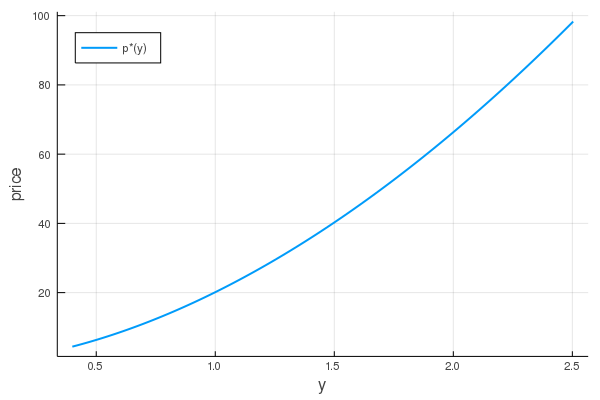

In [5]:
plot(tree.grid, price_vals, lw = 2, label = "p*(y)")
plot!(xlabel = "y", ylabel = "price", legend = :topleft)

O preço está aumentando, mesmo se removermos toda a correlação serial do processo de dotação.

A razão é que uma maior dotação atual reduz a utilidade marginal atual.

Portanto, o preço deve subir para induzir a família a consumir toda a dotação (e, portanto, satisfazer a restrição de recursos).

O que acontece com um consumidor mais paciente?

Aqui a linha laranja corresponde aos parâmetros anteriores e a linha verde é o preço quando  $ \beta = 0.98 $.

<a id='mass-lt-cb'></a>

<img src="https://julia.quantecon.org/multi_agent_models/_static/figures/solution_mass_ex2.png" style="width:70%;">

  
Vemos que, quando os consumidores são mais pacientes, o ativo se torna mais valioso e o preço da árvore de Lucas aumenta.

O Exercício 1 pede para você replicar esta figura.

## Exercícios

<a id='lucas-asset-ex1'></a>

### Exercício 1

Replique [a figura](#mass-lt-cb) para mostrar como as taxas de desconto afetam os preços.

## Soluções

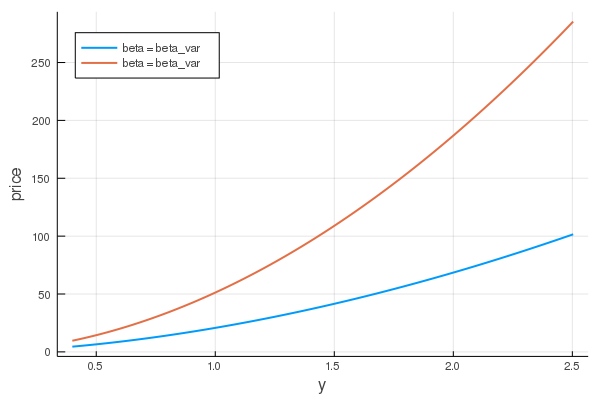

In [6]:
plot()
for β in (.95, 0.98)
    tree = LucasTree(;β = β)
    grid = tree.grid
    price_vals = solve_lucas_model(tree)
    plot!(grid, price_vals, lw = 2, label = "beta = beta_var")
end

plot!(xlabel = "y", ylabel = "price", legend = :topleft)